In [2]:
import pandas as pd
import numpy as np
import random
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

In [3]:
def generate_mcqs(output_name, file_path="data/mcqs.csv", num_topics=10):
    # One-hot encoding for difficulty (values 1-5)
    def one_hot_difficulty(difficulty):
        vec = np.zeros(5)
        if 1 <= difficulty <= 5:
            vec[int(difficulty) - 1] = 1
        return vec

    try:
        mcqs_df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading CSV file: {e}")

    #rename the id column to id
    mcqs_df.rename(columns={'id': 'mcq_id'}, inplace=True)
    mcqs_df['topic'] = mcqs_df['mcq_id'].str.extract(r'OIC-(\d+)-\d+-[A-Z]')
    distinct_count = mcqs_df['topic'].nunique()

    print("Number of distinct topics values:", distinct_count)

    mcqs_df['id'] = mcqs_df.index
    mcqs_df['difficulty'] = mcqs_df['difficulty'].apply(one_hot_difficulty)
     # drop columns mcq_json, content_gpt
    mcqs_df.drop(columns=['mcq_json', 'rubric', 'gpt_answer', 'content_gpt', 'originality', 'readability', 'starts_with_negation', 'is_question', 'relevance', 'ambiguity', 'disclosure', 'distractor_quality'], inplace=True, errors='ignore')
    # reorder the columns
    mcqs_df = mcqs_df[['id', 'mcq_id', 'topic', 'question', 'option_a', 'option_b', 'option_c', 'option_d', 'correct_option', 'difficulty']]
    
    topics = mcqs_df['topic'].unique()
    #create a dictionary with the topics and their indexes
    topic_map = {topic: i for i, topic in enumerate(topics)}
    topics = random.sample(list(topics), num_topics)
    print(topics)
    mcqs_df = mcqs_df[mcqs_df['topic'].isin(topics)].reset_index(drop=True)
    print(mcqs_df.shape)
    # save the dataframe to a csv file
    #mcqs_df.to_csv(f"{output_name}.csv", index=False)

    return mcqs_df


In [ ]:
display(generate_mcqs('dsad', 'data/medical.csv', num_topics=10).head())

In [5]:
df=pd.read_csv('data/math.csv', sep=';', encoding='latin1')
print(df['difficulty_level'].value_counts())
df.head()

difficulty_level
1    477
2    461
3    399
4    387
5    147
6     42
Name: count, dtype: int64


,ï»¿id,question,difficulty_level,correct_answer,answer2,answer3,answer4,topic_id,topic_name
0,79,What number is missing from the table?\n\n$\be...,3,$180$,$150$,$1020$,$400$,14,Statistics
1,80,The amount spent on entertainment in a month w...,3,$167 Â$,$200 Â$,$120 Â$,$325 Â$,14,Statistics
2,81,The amount spent on entertainment in a month w...,3,$120 Â$,$200 Â$,$167 Â$,$325 Â$,14,Statistics
3,82,Differentiate $\displaystyle{y = 2x\sin(x)}$.,1,$2\left(\sin\left(x\right)+x\cos\left(x\right)...,$\left(\sin\left(2x\right)+x\cos\left(2x\right...,$2x\left(\sin\left(x\right)+x\cos\left(x\right...,$\left(2\sin\left(x\right)-2x\cos\left(x\right...,4,Differentiation
4,83,The image of the function $f(x)=x^3+\log (x)$ is,1,$\mathbb{R}$,"$(0,+\infty)$","$[0,+\infty)$","$(-\infty,0)$",3,Real Functions of a Single Variable


In [141]:
df=pd.read_csv('data/test12/quizzes_math.csv', sep=',')
#pd.read_csv('data/medical.csv', sep=',')
#math['Level'].value_counts()
df.head()


,quiz_id,mcq_1,mcq_2,mcq_3,mcq_4,mcq_5,mcq_6,mcq_7,mcq_8,mcq_9,...,topic_coverage_6,topic_coverage_7,topic_coverage_8,topic_coverage_9,difficulty_coverage_0,difficulty_coverage_1,difficulty_coverage_2,difficulty_coverage_3,difficulty_coverage_4,difficulty_coverage_5
0,0,577,765,1572,117,1755,107,1185,1200,1329,...,0.0,0.0,0.0,0.2,0.3,0.1,0.1,0.5,0.0,0.0
1,1,1795,1265,94,1054,1252,1438,792,112,1339,...,0.0,0.0,0.0,0.0,0.4,0.1,0.4,0.0,0.1,0.0
2,2,371,913,97,889,1548,807,1829,1744,121,...,0.1,0.2,0.0,0.0,0.1,0.2,0.1,0.1,0.5,0.0
3,3,265,75,107,264,1557,1453,1444,1715,1799,...,0.1,0.1,0.1,0.1,0.4,0.3,0.2,0.1,0.0,0.0
4,4,1403,404,1274,1850,914,1607,1525,1695,14,...,0.0,0.2,0.0,0.1,0.0,0.0,0.5,0.2,0.2,0.1


In [ ]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

with open('jsons/test12/universes/universe.json', 'r') as f:
    universe = json.load(f)

#plot an histogram of the cosine similarity between the universe and itself in a plot
plt.hist(cosine_similarity(universe, universe))
plt.show()


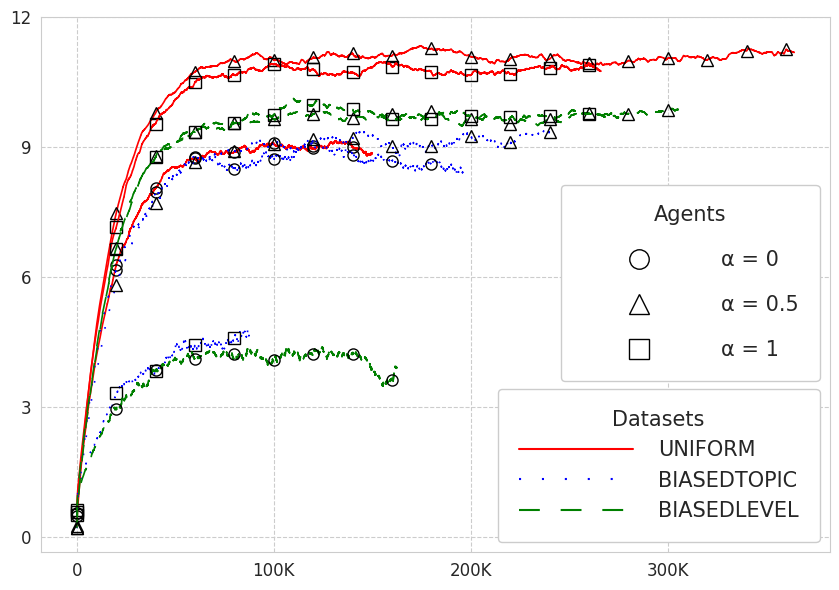

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import json 
import numpy as np

def flatten_nested_array(nested_array):
    """Recursively flatten a nested array of lists into a single 1D NumPy array."""
    flat_list = []

    def recurse(item):
        if isinstance(item, (list, tuple, np.ndarray)):
            for subitem in item:
                recurse(subitem)
        else:
            flat_list.append(item)

    recurse(nested_array)
    return np.array(flat_list, dtype=np.float32)

def moving_average(data, window_size=64):
    """Compute the moving average using a window."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def get_label(test):
    if test == 'test1':
        return 'UNIFORM'
    elif test == 'test4':
        return 'BIASEDTOPIC'
    else:
        return 'BIASEDLEVEL'

def plot_agent_data(input_path, alfa_values, y_label, title, output_name, window_size=64, flag=False, save=True, show=False):
    """Plot the agent_data with a moving average using seaborn for better visualization."""
    # Set the style
    sns.set_style("whitegrid")
    plt.rcParams['figure.facecolor'] = 'white'
    #plt.rcParams.update({'font.size': 20})
    # Create figure
    fig = plt.figure(figsize=(10, 6))
    
    # Define line styles for tests and markers for alpha values
    tests = ['test1', 'test4', 'test5']
    # Custom dash patterns for more spacing
    line_styles = ['-', (0, (1, 10)), (0, (10, 10))]  # solid, dotted, dashed with increased spacing
    markers = ['o', '^', 's', 'D', 'v', 'p']  # circle, triangle, square, diamond, triangle_down, pentagon
    colors = ['red', 'blue', 'green', 'yellow', 'purple']
    # Create separate legend handles for line styles and markers
    line_handles = []
    marker_handles = []
    
    for test_idx, test in enumerate(tests):
        for idx, alfa in enumerate(alfa_values):
            with open(f'{input_path}/{test}/qvalues/all_qvalues_alfa_{alfa}.json', 'r') as f:
                agent_data = json.load(f)
                
            if flag:
                data_array = flatten_nested_array(agent_data)
            else:
                data_array = np.array(agent_data).flatten()
                
            # Calculate moving average
            smoothed_data = moving_average(data_array, window_size)
            x_values = np.arange(len(smoothed_data))
            
            # Plot with markers and line styles
            line = plt.plot(x_values, smoothed_data, 
                    color=colors[test_idx],  # All lines in black
                    linestyle=line_styles[test_idx],
                    marker=markers[idx % len(markers)],
                    markerfacecolor='none',
                    markeredgecolor='black',
                    markevery=20000,  # Add marker every 200 points for more spacing
                    markersize=8,  # Increase marker size
                    linewidth=1.2)
            
            # Store handles for legend
            if idx == 0:  # Only add line style once per test
                line_handles.append(plt.Line2D([], [], color=colors[test_idx], linestyle=line_styles[test_idx], label=get_label(test)))
            if test_idx == 0:  # Only add marker once per alpha
                # Create a custom marker with a horizontal line
                marker_handles.append(plt.Line2D([], [], 
                                            color='black', 
                                            marker=markers[idx % len(markers)],
                                            linestyle='None',  # <-- remove horizontal line
                                            markersize=14,     # <-- slightly larger marker
                                            markerfacecolor='none',
                                            markeredgecolor='black',
                                            label=f'α = {alfa}'))

    # Customize plot
    # Format x-axis ticks to show K for values over 1000
    def format_func(x, p):
        if x >= 1000:
            return f'{int(x/1000)}K'
        return str(int(x))
    
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    plt.yticks(range(0, 13, 3), fontsize=40)
    # Set x-label based on the metric
    plt.xticks(range(0, 360000, 100000), fontsize=40)
    #x_label = 'Iterations' if y_label in ['Q-value', 'Loss'] else 'Episodes'
    # Create two separate legends
    legend1 = plt.legend(handles=line_handles, title='Datasets', 
                        frameon=True, fancybox=True, framealpha=1, 
                        fontsize=15,  # Increased font size
                        loc='lower right',
                        handlelength=5.5,       # Even longer box
                        handletextpad=1.2,      # More padding
                        borderpad=1,          # More internal space
                        bbox_to_anchor=(1.0, 0.0),  # Position at bottom right
                        title_fontsize=15)  # Increased title font size
    plt.gca().add_artist(legend1)
    #left align the legend
    plt.legend(handles=marker_handles, title='Agents', 
            frameon=True, fancybox=True, framealpha=1,
            fontsize=15,            # Slightly larger font
            handlelength=5.5,       # Even longer box
            handletextpad=1.2,      # More padding
            borderpad=1,          # More internal space
            labelspacing=1.2,       # Increase vertical spacing between entries
            loc='lower right',
            bbox_to_anchor=(1.0, 0.3),
            title_fontsize=15)            # Increase line width of border
    
    # Customize grid
    plt.grid(True, linestyle='--', alpha=0.99)
    # Customize ticks
    plt.tick_params(labelsize=12)
    
    # Adjust layout to make room for legends
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave 15% space on the right for legends
    
    # Save and show
    if save:
        plt.savefig(f'../images/{output_name}.png', 
                    bbox_inches='tight',
                    dpi=300,
                    facecolor='white')
    if show:
        plt.show()
    plt.close()

plot_agent_data('jsons/', [0, 0.5, 1], 'Q-value', 'Training Qvalue', f'all_success', window_size=1024, flag=True, save=False, show=True)

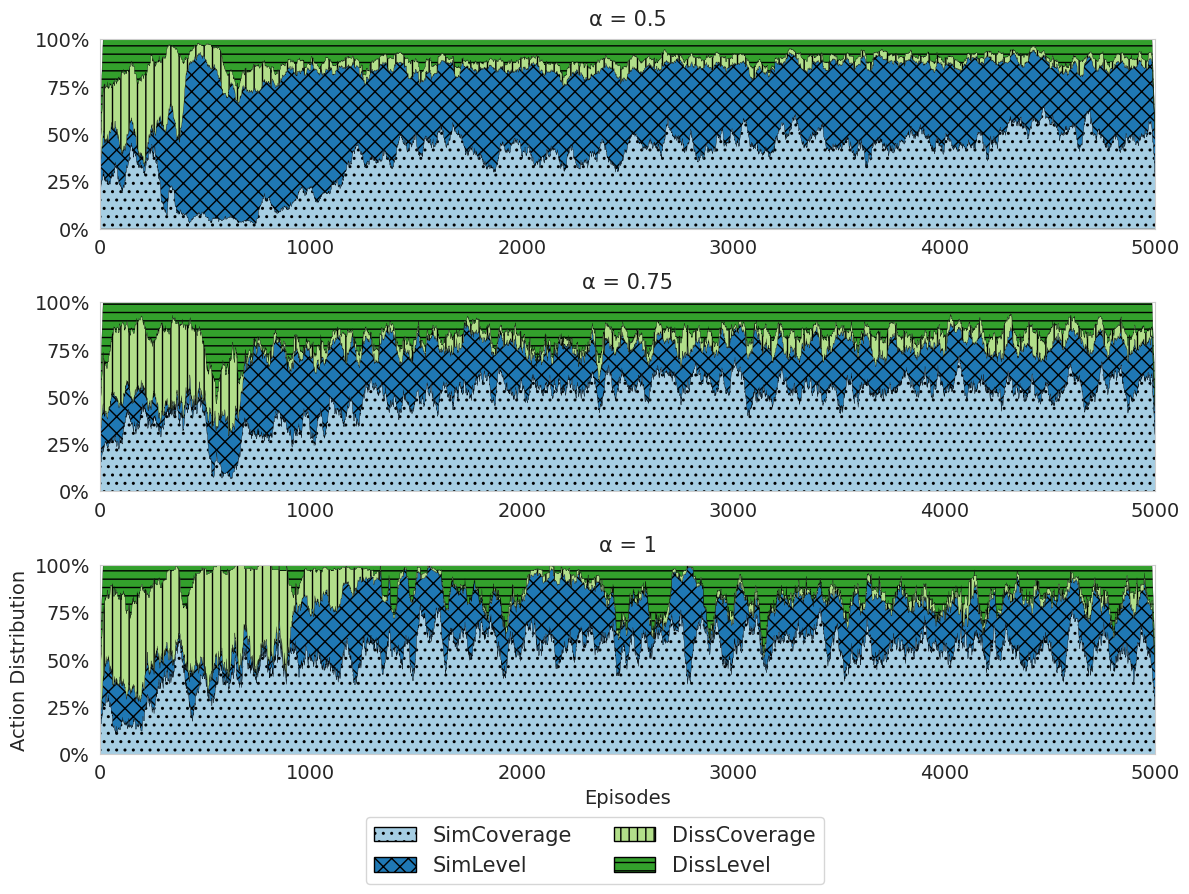

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import json

def get_label(action):
    if int(action) == 0:
        return 'SimCoverage'
    elif int(action) == 1:
        return 'SimLevel'
    elif int(action) == 2:
        return 'DissCoverage'
    elif int(action) == 3:
        return 'DissLevel'

def plot_action_distribution(input_path, alfa_values, title, output_name, window_size=32, save=True, show=False):
    """Plot the action distribution using seaborn for better visualization."""
    # Set the style
    sns.set_style("whitegrid")
    plt.rcParams['figure.facecolor'] = 'white'
    
    # Create a figure with a more efficient layout
    n_plots = len(alfa_values)
    n_cols = 1
    n_rows = 3
    
    fig = plt.figure(figsize=(12, 3 * n_rows))
    gs = plt.GridSpec(n_rows, n_cols, figure=fig)
    
    # Use a distinct seaborn color palette
    palette = sns.color_palette("Paired", 4)
    
    for j, alfa in enumerate(alfa_values):
        with open(f'{input_path}_alfa_{alfa}.json', 'r') as f:
            data = json.load(f)

        # Count occurrences of each action in every episode
        episodes = len(data)
        action_counts = {i: np.zeros(episodes) for i in range(4)}
        
        for i, episode in enumerate(data):
            if not isinstance(episode, list):
                continue
            for action in episode:
                action_counts[action][i] += 1

        # Normalize counts per episode
        normalized_values = np.array([action_counts[action] for action in range(4)])
        episode_sums = normalized_values.sum(axis=0)
        episode_sums[episode_sums == 0] = 1
        normalized_values /= episode_sums

        # Smooth the values
        smoothed_values = []
        for action_vals in normalized_values:
            kernel_size = min(window_size, len(action_vals))
            kernel = np.ones(kernel_size) / kernel_size
            smoothed = np.convolve(action_vals, kernel, mode='same')
            smoothed_values.append(smoothed[:episodes])
        
        smoothed_values = np.array(smoothed_values)

        # Create subplot
        ax = fig.add_subplot(gs[j // n_cols, j % n_cols])
        ax.stackplot(range(episodes), 
                     *smoothed_values,
                     colors=palette,
                     hatch=['..', 'xx', '||', '--'],  # Add different patterns for each action
                     linewidth=0.2,
                     edgecolor='black')
        
        # Customize subplot
        ax.set_title(f"α = {alfa}", pad=10, fontsize=15)
        if j == 2:
            ax.set_ylabel("Action Distribution", fontsize=14)
            ax.set_xlabel("Episodes", fontsize=14)
        ax.set_ylim(0, 1)
        ax.set_xlim(0, episodes)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x*100:.0f}%")) 
        ax.tick_params(labelsize=14)
        ax.grid(False)

    # Create custom legend handles with hatches
    hatches = ['..', 'xx', '||', '--']
    legend_labels = [get_label(i) for i in range(4)]
    legend_handles = [
        mpatches.Patch(facecolor=palette[i], edgecolor='black', hatch=hatches[i], label=legend_labels[i])
        for i in range(4)
    ]

    # Add a single legend at the bottom of the figure
    fig.legend(handles=legend_handles,
            loc='lower center',
            ncol=2,
            fontsize=15,
            frameon=True,
            bbox_to_anchor=(0.5, -0.03))
    
    # Add main title
    plt.tight_layout(rect=[0, 0.05, 1, 0.97])  # Leave space for bottom legend and top title

    # Save and show
    if save:
        plt.savefig(f'../images/{output_name}.png', bbox_inches='tight', dpi=300)
    if show:
        plt.show()
    plt.close()


    
# Plot action distribution
test_num = 'test4'
plot_action_distribution(f'jsons/{test_num}/actions/all_actions', [0.5, 0.75, 1], 
                        f'Action Distribution', f'{test_num}/all_actions', window_size=int(128/4), save=False, show=True) 

/tmp/ipykernel_7212/3820174840.py:310: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


10 inference runs for alfa 0: Average reward -> 0.874, BRUTEFORCE Reward -> 0.997, Std -> 0.047
10 inference runs for alfa 0.25: Average reward -> 0.850, BRUTEFORCE Reward -> 0.995, Std -> 0.039
10 inference runs for alfa 0.5: Average reward -> 0.871, BRUTEFORCE Reward -> 0.994, Std -> 0.040
10 inference runs for alfa 0.75: Average reward -> 0.902, BRUTEFORCE Reward -> 0.994, Std -> 0.048
10 inference runs for alfa 1: Average reward -> 0.889, BRUTEFORCE Reward -> 0.999, Std -> 0.122


/tmp/ipykernel_7212/3820174840.py:369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


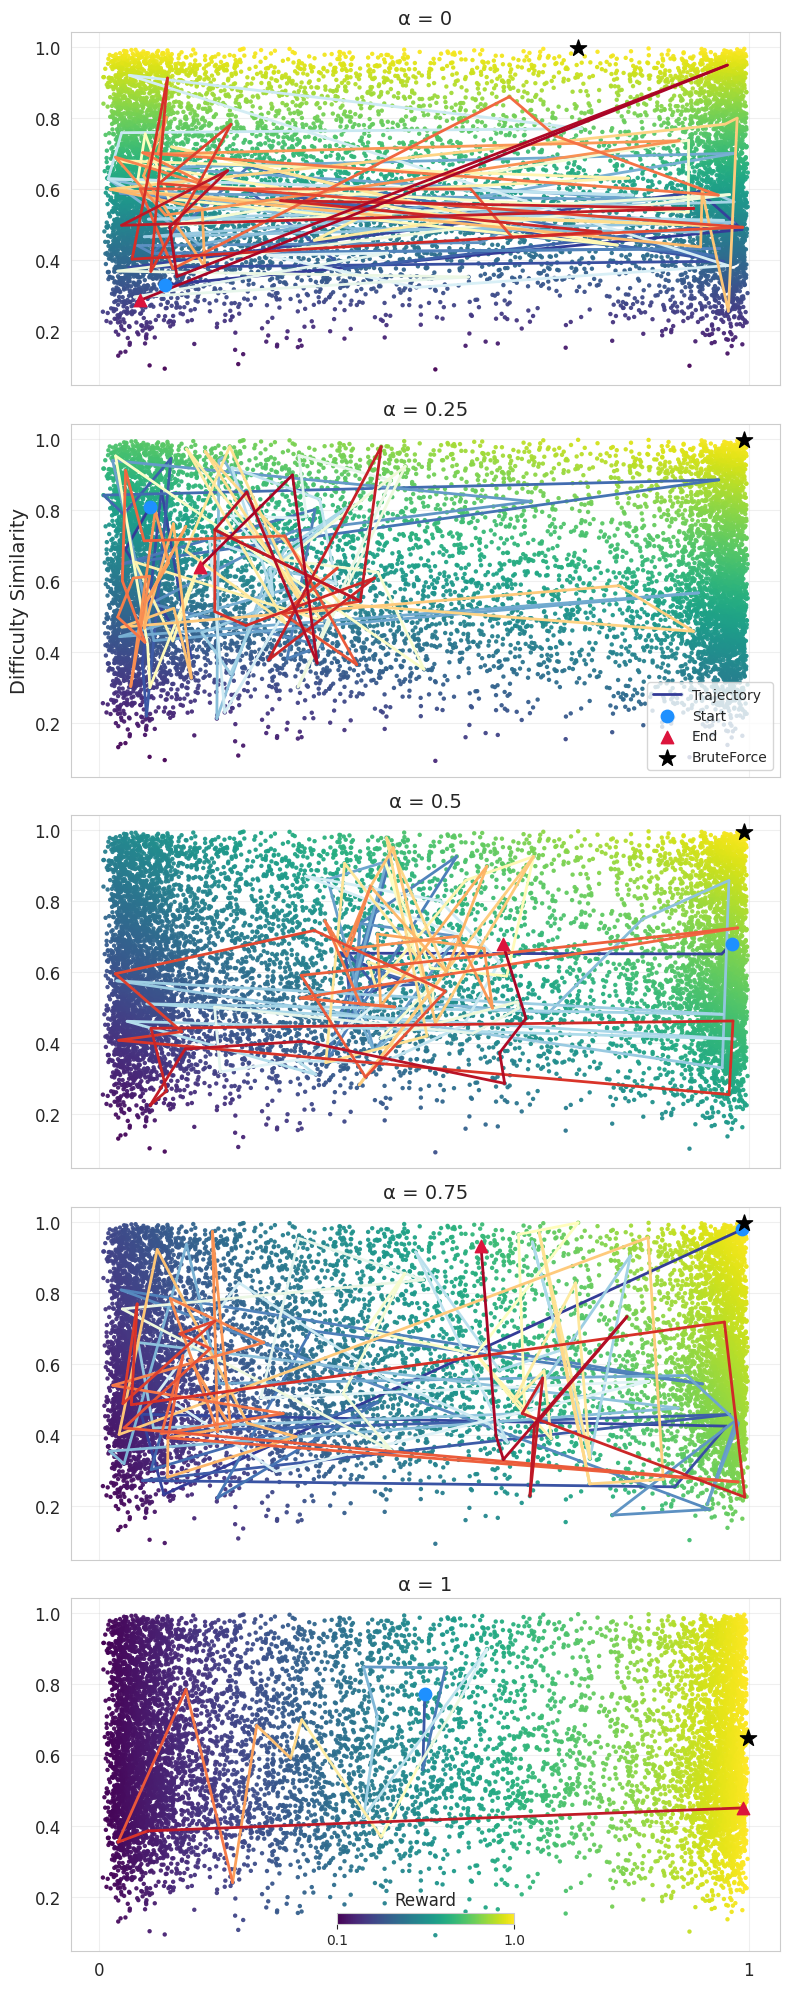

In [14]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridSpec
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def save_to_log(data, output_name, mode='a', flag=True):   
    with open(f"{output_name}.log", mode) as f:
        f.write(data + '\n')
    if flag:
        print(data)

def compute_reward(alfa, state, targets):
    """Compute the reward for a given state and targets."""
    target_dim1 = targets[0]
    target_dim2 = targets[1]
    vec1, vec2 = state[:target_dim1.shape[0]], state[target_dim1.shape[0]:]
    first_dim_metric = cosine_similarity(vec1.reshape(1, -1), target_dim1.reshape(1, -1))[0][0]
    second_dim_metric = cosine_similarity(vec2.reshape(1, -1), target_dim2.reshape(1, -1))[0][0]
    
    reward = alfa * first_dim_metric + (1 - alfa) * second_dim_metric
    return reward

def get_best_state_inference(visited_states, targets, alfa):
    """Get the best state from the inference data."""
    rewards = []
    target_dim1 = targets[0]
    target_dim2 = targets[1]
    for state in visited_states:
        vec1, vec2 = state[:target_dim1.shape[0]], state[target_dim1.shape[0]:] 
        
        first_dim_metric = cosine_similarity(vec1.reshape(1, -1), target_dim1.reshape(1, -1))[0][0]
        second_dim_metric = cosine_similarity(vec2.reshape(1, -1), target_dim2.reshape(1, -1))[0][0]
        
        reward = alfa * first_dim_metric + (1 - alfa) * second_dim_metric
        rewards.append(reward)
    
    best_idx = np.argmax(rewards)
    return rewards[best_idx]

def get_inference_data(test_number, alfa, universe, targets, alfa_values=[0, 0.25, 0.5, 0.75, 1]):
    # Load agent inference data
    visited_states = load_agent_data(test_number, alfa)
    # Load baseline data
    baseline_states = load_baseline_data(test_number)
    
    best_inference_reward = []
    for inference_states in visited_states:
        best_inference_reward.append(get_best_state_inference(universe[inference_states], targets, alfa))

    #round np.mean(best_inference_reward) to 4 decimal places
    mean_reward = np.mean(best_inference_reward)
    best_reward = compute_reward(alfa, universe[baseline_states[alfa_values.index(alfa)]], targets) 
    std_reward = np.std(best_inference_reward)
    save_to_log(f"{len(visited_states)} inference runs for alfa {alfa}: Average reward -> {mean_reward:.3f}, BRUTEFORCE Reward -> {best_reward:.3f}, Std -> {std_reward:.3f}", f'logs/{test_number}/inference')

    return visited_states[np.argmax(best_inference_reward)], baseline_states

def get_best_state(universe, targets, alfa, num_topics):
    """Find the best state in the universe based on the reward value"""
    rewards = []
    target_dim1 = targets[0]
    target_dim2 = targets[1]
    
    for state in universe:
        vec1, vec2 = state[:num_topics], state[num_topics:] 
        
        first_dim_metric = cosine_similarity(vec1.reshape(1, -1), target_dim1.reshape(1, -1))[0][0]
        second_dim_metric = cosine_similarity(vec2.reshape(1, -1), target_dim2.reshape(1, -1))[0][0]
        
        reward = alfa * first_dim_metric + (1 - alfa) * second_dim_metric
        rewards.append(reward)
    
    best_idx = np.argmax(rewards)
    return best_idx, rewards[best_idx]


def load_data(test_number):
    """Load universe and targets data from JSON files."""
    with open(f"jsons/{test_number}/universes/targets.json", "r") as f:
        targets = json.load(f)
        targets = [np.array(t, dtype=np.float32) for t in targets]
    
    with open(f"jsons/{test_number}/universes/universe.json", "r") as f:
        universe = json.load(f)
        universe = np.array(universe, dtype=np.float32)
    
    return universe, targets

def load_agent_data(test_number, alfa):
    """Load agent inference data for a specific alfa value."""
    input_name = f"jsons/{test_number}/agent_inference/inference_states_alfa_{alfa}"
    with open(f'{input_name}.json', 'r') as f:
        agent_data = json.load(f)
        agent_data = [np.array(d, dtype=np.int32) for d in agent_data]
        # agent_data = np.array(agent_data, dtype=np.int32)
    return agent_data

def load_baseline_data(test_number):
    """Load baseline inference data."""
    input_name = f"jsons/{test_number}/baseline_inference/baseline_states"
    with open(f'{input_name}.json', 'r') as f:
        best_state = json.load(f)
        best_state = np.array(best_state, dtype=np.int32)
    return best_state

def get_inference_data(test_number, alfa, universe, targets, alfa_values=[0, 0.25, 0.5, 0.75, 1]):
    # Load agent inference data
    visited_states = load_agent_data(test_number, alfa)
    # Load baseline data
    baseline_states = load_baseline_data(test_number)
    
    best_inference_reward = []
    for inference_states in visited_states:
        best_inference_reward.append(get_best_state_inference(universe[inference_states], targets, alfa))

    #round np.mean(best_inference_reward) to 4 decimal places
    mean_reward = np.mean(best_inference_reward)
    best_reward = compute_reward(alfa, universe[baseline_states[alfa_values.index(alfa)]], targets) 
    std_reward = np.std(best_inference_reward)
    save_to_log(f"{len(visited_states)} inference runs for alfa {alfa}: Average reward -> {mean_reward:.3f}, BRUTEFORCE Reward -> {best_reward:.3f}, Std -> {std_reward:.3f}", f'logs/{test_number}/inference')

    return visited_states[np.argmax(best_inference_reward)], baseline_states

def load_data(test_number):
    """Load universe and targets data from JSON files."""
    with open(f"jsons/{test_number}/universes/targets.json", "r") as f:
        targets = json.load(f)
        targets = [np.array(t, dtype=np.float32) for t in targets]
    
    with open(f"jsons/{test_number}/universes/universe.json", "r") as f:
        universe = json.load(f)
        universe = np.array(universe, dtype=np.float32)
    
    return universe, targets


# def plot_agent_comparison(universe, targets, alfa, alfa_values, test_number, output_name, save=True, show=False):
#     """Create a single plot for a specific agent and alfa value."""
#     # Parameters
#     D = targets[0].shape[0]
#     # Compute rewards for all universe states
#     vec1s = universe[:, :D]
#     vec2s = universe[:, D:]
    
#     sim1 = cosine_similarity(vec1s, targets[0].reshape(1, -1)).flatten()
#     sim2 = cosine_similarity(vec2s, targets[1].reshape(1, -1)).flatten()
    
#     # Set up the figure
#     fig, ax = plt.subplots(figsize=(10, 8))
    
#     # Define colors for special points
#     colors = ["#0d6be3", "#d7129b", "#581845", "#d62728", "#9467bd", 
#               "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    
#     # Initialize PCA
#     pca = PCA(n_components=2)
#     X_2d = pca.fit_transform(universe)
    
#     # Compute rewards for current alfa
#     rewards = alfa * sim1 + (1 - alfa) * sim2
    
#     # Plot universe points with reward-based coloring
#     scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=rewards, cmap='viridis', s=5)
    
#     # Load and process inference data
#     visited_states, baseline_states = get_inference_data(test_number, alfa, universe, targets)
#     visited_coords = X_2d[visited_states]

#     baseline_state = baseline_states[alfa_values.index(alfa)]
#     baseline_coords = X_2d[baseline_state]
    
#     # Plot baseline point
#     ax.scatter(baseline_coords[0], baseline_coords[1], color=colors[2], 
#               marker="*", label='BRUTEFORCE', s=150)
    
#     # Plot the agent's path with increasing intensity
#     for idx in range(len(visited_coords) - 1):
#         ax.plot(
#             visited_coords[idx:idx+2, 0], 
#             visited_coords[idx:idx+2, 1], 
#             color=plt.cm.Reds(idx / len(visited_coords)+0.1), 
#             linewidth=2, 
#             alpha=0.8
#         )
    
#     # Plot start and end points
#     ax.scatter(visited_coords[0, 0], visited_coords[0, 1], 
#               color=colors[0], label='Start', s=100)
#     ax.scatter(visited_coords[-1, 0], visited_coords[-1, 1], 
#               color=colors[1], label='End', s=100)
    
#     # Add grid and labels
#     ax.grid(True, alpha=0.3)
#     ax.set_title(f"Alfa = {alfa}", pad=10)
#     ax.set_ylabel("Difficulty Level")
#     ax.set_xlabel("Topic Coverage")
#     # Add legend
#     ax.legend(loc="upper right", framealpha=0.8)
#     # Add colorbar
#     cbar = plt.colorbar(scatter, ax=ax)
#     cbar.set_label("Reward")
#     # Adjust layout
#     plt.tight_layout()
#     # Save or show the figure
#     if save:
#         plt.savefig(f"images/{output_name}_alfa_{alfa}.png", dpi=300, bbox_inches='tight')
#     if show:
#         plt.show()
#     plt.close()

# def plot_agent_comparison(universe, targets, alfa, alfa_values, test_number, output_name, save=True, show=False):
#     """Plot points in sim1 vs sim2 space, with trajectory and key states marked."""
#     D = targets[0].shape[0]
    
#     # Compute reward components
#     vec1s = universe[:, :D]
#     vec2s = universe[:, D:]
    
#     sim1 = cosine_similarity(vec1s, targets[0].reshape(1, -1)).flatten()
#     sim2 = cosine_similarity(vec2s, targets[1].reshape(1, -1)).flatten()
#     rewards = alfa * sim1 + (1 - alfa) * sim2

#     # Use sim1 and sim2 directly for coordinates
#     X = sim1
#     Y = sim2
    
#     fig, ax = plt.subplots(figsize=(10, 8))
    
#     # Plot universe points using sim1 and sim2 as coordinates
#     scatter = ax.scatter(X, Y, c=rewards, cmap='viridis', s=5)
    
#     # Load and process inference data
#     visited_states, baseline_states = get_inference_data(test_number, alfa, universe, targets)
    
#     visited_coords = np.column_stack((sim1[visited_states], sim2[visited_states]))
#     baseline_state = baseline_states[alfa_values.index(alfa)]
#     baseline_coord = (sim1[baseline_state], sim2[baseline_state])
    
#     colors = ["#0d6be3", "#d7129b", "#581845", "#d62728", "#9467bd", 
#               "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    
#     # Plot the agent's path
#     for idx in range(len(visited_coords) - 1):
#         ax.plot(
#             visited_coords[idx:idx+2, 0], 
#             visited_coords[idx:idx+2, 1], 
#             color=plt.cm.Reds(idx / len(visited_coords) + 0.1), 
#             linewidth=2, 
#             alpha=0.8
#         )
    
#     # Plot start and end points
#     ax.scatter(visited_coords[0, 0], visited_coords[0, 1], 
#                color=colors[0], label='Start', s=100)
#     ax.scatter(visited_coords[-1, 0], visited_coords[-1, 1], 
#                color=colors[1], label='End', s=100)
    
#     # Plot baseline
#     ax.scatter(baseline_coord[0], baseline_coord[1], 
#                color=colors[2], marker="*", label='BRUTEFORCE', s=150)
    
#     ax.set_xlabel("Sim1 (Topic Coverage)", fontsize=12)
#     ax.set_ylabel("Sim2 (Difficulty Level)", fontsize=12)
#     ax.set_title(f"Agent Trajectory in Reward Component Space (α = {alfa})", pad=10)
#     ax.grid(True, alpha=0.3)
#     ax.legend(loc="upper right", framealpha=0.8)
    
#     cbar = plt.colorbar(scatter, ax=ax)
#     cbar.set_label("Total Reward", fontsize=12)
    
#     plt.tight_layout()
#     if save:
#         plt.savefig(f"images/{output_name}_alfa_{alfa}.png", dpi=300, bbox_inches='tight')
#     if show:
#         plt.show()
#     plt.close()

def plot_agent_comparison_dual(universe, targets, alfa_values, test_number, output_name, save=True, show=False):
    """Plot two agent behaviors (good and bad) with reward landscape and trajectory."""

    D = targets[0].shape[0]
    vec1s = universe[:, :D]
    vec2s = universe[:, D:]

    sim1 = cosine_similarity(vec1s, targets[0].reshape(1, -1)).flatten()
    sim2 = cosine_similarity(vec2s, targets[1].reshape(1, -1)).flatten()

    # Compute 2D coordinates for the reward landscape
    x_vals = sim1
    y_vals = sim2

    rewards = {alfa: alfa * sim1 + (1 - alfa) * sim2 for alfa in alfa_values}
    colors = {
        "start": "#1E90FF",       # Crimson
        "end": "#DC143C",         # Dodger Blue
        "brute": "#000000"        # Black
    }

    fig, axes = plt.subplots(5, 1, figsize=(8, 20), sharex=True, sharey=True)
    norm = Normalize(vmin=min([rewards[a].min() for a in alfa_values]),
                     vmax=max([rewards[a].max() for a in alfa_values]))

    cmap = cm.get_cmap('viridis')

    for i, (ax, alfa) in enumerate(zip(axes, alfa_values)):
        reward_vals = rewards[alfa]

        # Plot reward landscape using seaborn
        sns.scatterplot(x=x_vals, y=y_vals, hue=reward_vals, palette="viridis",
                        ax=ax, legend=False, s=10, linewidth=0, alpha=0.95)

        visited_states, baseline_states = get_inference_data(test_number, alfa, universe, targets)
        visited_coords = np.column_stack([x_vals[visited_states], y_vals[visited_states]])
        baseline_state = baseline_states[alfa_values.index(alfa)]
        baseline_coord = [x_vals[baseline_state], y_vals[baseline_state]]

        # Plot trajectory
        for idx in range(len(visited_coords) - 1):
            ax.plot(
                visited_coords[idx:idx+2, 0],
                visited_coords[idx:idx+2, 1],
                color=cm.RdYlBu_r(((idx + 1) / len(visited_coords))),
                linewidth=2,
                label="Trajectory" if idx == 0 else ""
            )

        ax.scatter(*visited_coords[0], color=colors["start"], s=80, label="Start", zorder=5)
        ax.scatter(*visited_coords[-1], color=colors["end"], marker="^", s=80, label="End", zorder=5)
        ax.scatter(*baseline_coord, color=colors["brute"], marker='*', s=150, label="BruteForce", zorder=5)

        ax.set_title(f"α = {alfa}", fontsize=14)
        ax.grid(True, alpha=0.3)

        if i == 1:
            ax.set_ylabel("Difficulty Similarity", fontsize=14)
            ax.set_xlabel("Coverage Similarity", fontsize=14)

            # Create scalar mappable using the viridis colormap and value range
            vmin = np.min([h.min() for h in reward_vals])
            vmax = np.max([h.max() for h in reward_vals])
            sm = plt.cm.ScalarMappable(cmap="viridis", norm=mcolors.Normalize(vmin=vmin, vmax=vmax))
            sm.set_array([])

            # Add inset colorbar to the last axis
            inset_ax = inset_axes(
                axes[-1],  # last plot
                width="25%",  # width relative to parent
                height="3%",  # height relative to parent
                loc="lower center",
                borderpad=2
                )
            cbar = plt.colorbar(sm, cax=inset_ax, orientation="horizontal", ticks=[vmin, vmax])
            cbar.ax.set_xticklabels([f"{vmin:.1f}", f"{vmax:.1f}"], fontsize=10)
            cbar.ax.set_title("Reward", fontsize=12, loc='center')
            ax.legend(loc='lower right', frameon=True)
        ax.tick_params(axis='both', labelsize=12)
        from matplotlib.ticker import MaxNLocator
        # Set the frequency of ticks on the x-axis and y-axis
        ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=5))  # Change nbins for x-axis
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Change nbins for y-axis

    plt.tight_layout()

    if save:
        plt.savefig(f"images/{output_name}_comparison.png", dpi=300, bbox_inches='tight')
    if show:
        plt.show()
    plt.close()




# Load data
test_number = 'test4'
alfa_values = [0, 0.25, 0.5, 0.75, 1]

universe, targets = load_data(test_number)
plot_agent_comparison_dual(universe, targets, alfa_values, test_number, f"{test_number}/comparison", save=False, show=True)

(10000,)
(10000,)
10 inference runs for alfa 0: Average reward -> 0.874, BRUTEFORCE Reward -> 0.997, Std -> 0.047
10 inference runs for alfa 1: Average reward -> 0.889, BRUTEFORCE Reward -> 0.999, Std -> 0.122


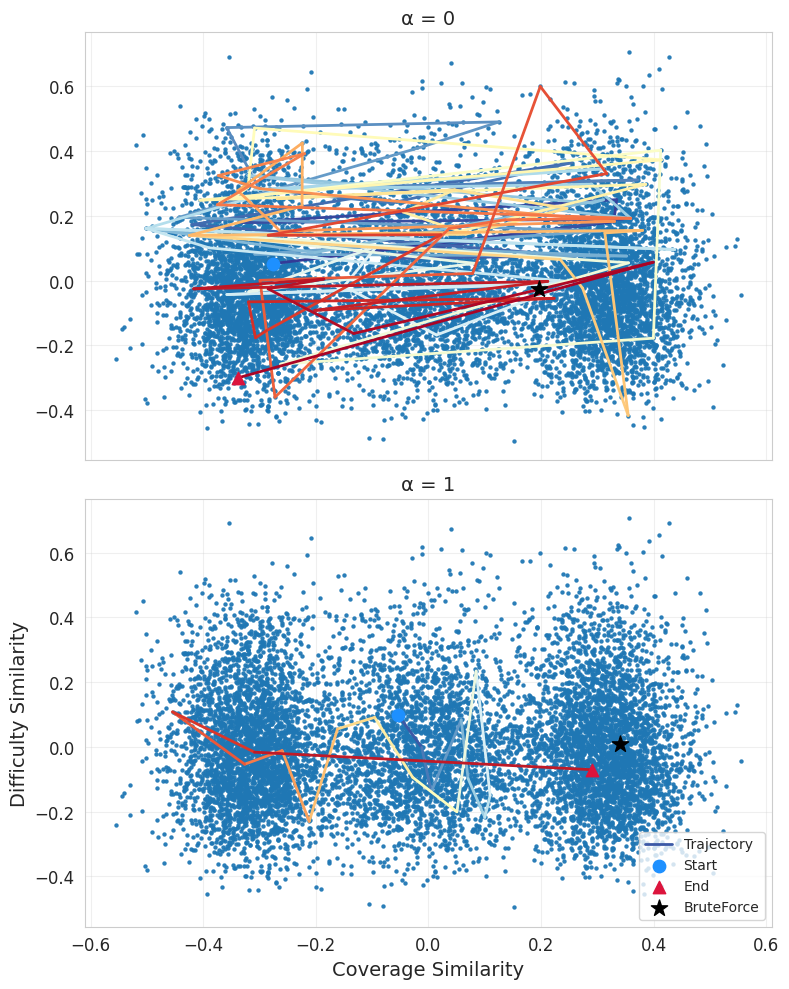

In [15]:
def plot_agent_comparison_dual(universe, targets, alfa_values, test_number, output_name, save=True, show=False):
    """Plot two agent behaviors (good and bad) with reward landscape and trajectory."""

    D = targets[0].shape[0]
    vec1s = universe[:, :D]
    vec2s = universe[:, D:]

    # Initialize PCA
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(universe)

    # Compute 2D coordinates for the reward landscape
    x_vals = X_2d[:, 0]
    y_vals = X_2d[:, 1]

    print(x_vals.shape)   
    print(y_vals.shape)   

    colors = {
        "start": "#1E90FF",       # Crimson
        "end": "#DC143C",         # Dodger Blue
        "brute": "#000000"        # Black
    }

    fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=True, sharey=True)

    for i, (ax, alfa) in enumerate(zip(axes, alfa_values)):

        # Plot reward landscape using seaborn
        sns.scatterplot(x=x_vals, y=y_vals, ax=ax, legend=False, s=10, linewidth=0, alpha=0.95)

        visited_states, baseline_states = get_inference_data(test_number, alfa, universe, targets)
        visited_coords = np.column_stack([x_vals[visited_states], y_vals[visited_states]])
        baseline_state = baseline_states[alfa_values.index(alfa)]
        baseline_coord = [x_vals[baseline_state], y_vals[baseline_state]]

        # Plot trajectory
        for idx in range(len(visited_coords) - 1):
            ax.plot(
                visited_coords[idx:idx+2, 0],
                visited_coords[idx:idx+2, 1],
                color=cm.RdYlBu_r(((idx + 1) / len(visited_coords))),
                linewidth=2,
                label="Trajectory" if idx == 0 else ""
            )

        ax.scatter(*visited_coords[0], color=colors["start"], s=80, label="Start", zorder=5)
        ax.scatter(*visited_coords[-1], color=colors["end"], marker="^", s=80, label="End", zorder=5)
        ax.scatter(*baseline_coord, color=colors["brute"], marker='*', s=150, label="BruteForce", zorder=5)

        ax.set_title(f"α = {alfa}", fontsize=14)
        ax.grid(True, alpha=0.3)

        if i == 1:
            ax.set_ylabel("Difficulty Similarity", fontsize=14)
            ax.set_xlabel("Coverage Similarity", fontsize=14)
            ax.legend(loc='lower right', frameon=True)
        ax.tick_params(axis='both', labelsize=12)

    plt.tight_layout()

    if save:
        plt.savefig(f"images/{output_name}_comparison.png", dpi=300, bbox_inches='tight')
    if show:
        plt.show()
    plt.close()




# Load data
test_number = 'test4'
alfa_values = [0, 1]

universe, targets = load_data(test_number)
plot_agent_comparison_dual(universe, targets, alfa_values, test_number, f"{test_number}/comparison", save=False, show=True)